# Terrorist activities in Sub Saharan Africa (SSA) between 1970 and 2019

## Preliminary Wrangling

> Before preprocessing, the dataset for this study had 21742 rows and 30 columns; 691 duplicates were found, as well as 2189 missing values in the *nkill* column, 4043 missing values in the *nwound* column, 543 missing values in the *latitude* column, and 544 missing values in the *longitude* column, which were all replaced with their mean values. Also, the following category variables (targsubtype1 txt= 605,target1= 19,natlty1 txt=140,weapsubtype1 txt=3188,weaptype2 txt=17388, andweapsubtype2 txt=17729) contain missing values, but they were left alone because they had no bearing on our result. As a consequence, the dataset utilized in this investigation had 20740 rows and 30 columns after preprocessing.

In [496]:
# importing labraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split #importing sampling helper
from sklearn.preprocessing import StandardScaler #importing preprocessing module
from sklearn.linear_model import LogisticRegression # Logistic regression classifier
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes classifier
from sklearn.svm import SVC #SVM classifier
from sklearn.neural_network import MLPClassifier # Neural network classifier
from sklearn.metrics import accuracy_score,classification_report # Accuracy metric

### Data collection and processing

In [382]:
#load dataset
tdf = pd.read_csv('tdata.csv')

In [387]:
# Numbers of rows and columns
tdf.shape

(21742, 30)

In [383]:
# Dataset previewing
tdf.head(8)

,iyear,imonth,iday,country_txt,latitude,longitude,crit1,crit2,crit3,doubtterr,...,weaptype2_txt,weapsubtype2_txt,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,11,Ethiopia,NaN,NaN,1,1,0,1,...,NaN,NaN,1.0,0.0,0,0,0,1,1,1
1,1970,3,14,Ethiopia,NaN,NaN,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,1,1,1
2,1970,4,0,Ethiopia,NaN,NaN,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,1,1,1
3,1971,1,15,Zambia,NaN,NaN,1,1,1,0,...,NaN,NaN,1.0,0.0,0,1,1,1,1,1
4,1971,1,22,Ethiopia,11.583513,37.397019,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,0,0,0
5,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1
6,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1
7,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1


In [384]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             21742 non-null  int64  
 1   imonth            21742 non-null  int64  
 2   iday              21742 non-null  int64  
 3   country_txt       21742 non-null  object 
 4   latitude          21170 non-null  float64
 5   longitude         21169 non-null  float64
 6   crit1             21742 non-null  int64  
 7   crit2             21742 non-null  int64  
 8   crit3             21742 non-null  int64  
 9   doubtterr         21742 non-null  int64  
 10  success           21742 non-null  int64  
 11  suicide           21742 non-null  int64  
 12  attacktype1_txt   21742 non-null  object 
 13  targtype1_txt     21742 non-null  object 
 14  targsubtype1_txt  21096 non-null  object 
 15  target1           21719 non-null  object 
 16  natlty1_txt       21596 non-null  object

In [385]:
#Replacing 1 and 0 to succeeded and failed in the success column respectively
tdf['success'] = tdf['success'].replace(1,'succeeded')
tdf['success'] = tdf['success'].replace(0,'failed')

In [386]:
#Checking the dateset to confirm if the success column has been changed
tdf.head(8)

,iyear,imonth,iday,country_txt,latitude,longitude,crit1,crit2,crit3,doubtterr,...,weaptype2_txt,weapsubtype2_txt,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,11,Ethiopia,NaN,NaN,1,1,0,1,...,NaN,NaN,1.0,0.0,0,0,0,1,1,1
1,1970,3,14,Ethiopia,NaN,NaN,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,1,1,1
2,1970,4,0,Ethiopia,NaN,NaN,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,1,1,1
3,1971,1,15,Zambia,NaN,NaN,1,1,1,0,...,NaN,NaN,1.0,0.0,0,1,1,1,1,1
4,1971,1,22,Ethiopia,11.583513,37.397019,1,1,1,0,...,NaN,NaN,0.0,0.0,0,1,0,0,0,0
5,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1
6,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1
7,1972,9,21,Zaire,-4.389166,15.337620,1,1,1,0,...,NaN,NaN,0.0,0.0,0,0,1,1,1,1


In [388]:
# Checking for number of duplicate in the  dataset
tdf.duplicated().sum() 

691

In [389]:
# Dropping duplicate values
tdf.drop_duplicates(keep=False,inplace=True)

In [390]:
# Checking for missing (null) values on each columns
tdf.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
latitude              543
longitude             544
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt      605
target1                19
natlty1_txt           140
gname                   0
weaptype1_txt           0
weapsubtype1_txt     3188
weaptype2_txt       17388
weapsubtype2_txt    17729
nkill                2189
nwound               4043
property                0
ishostkid               0
INT_LOG                 0
INT_IDEO                0
INT_MISC                0
INT_ANY                 0
dtype: int64

> There are 2107 missing values in nkill, 3920 missing values in nwound, 533 missing values in latitude, and 534 missing values in longitude. As a result, to avoid information loss, we would replace the missing values with their means.

In [391]:
#Chacking the mean values of all the variables
tdf_mean=tdf.mean().round(0) 
tdf_mean

iyear        2010.0
imonth          6.0
iday           16.0
latitude        2.0
longitude      25.0
crit1           1.0
crit2           1.0
crit3           1.0
doubtterr      -0.0
suicide         0.0
nkill           5.0
nwound          4.0
property       -1.0
ishostkid       0.0
INT_LOG        -4.0
INT_IDEO       -4.0
INT_MISC        0.0
INT_ANY        -3.0
dtype: float64

> We are going to use the mean values of **nkill = 5** and that of **nwound= 4**, **latitude = 2** and **longitude= 25** to fill in the NaNs in these varables

In [392]:
# Filling the missing value with the mean values of the columns of interest 
tdf = tdf.fillna(tdf_mean)

In [393]:
# To Confirm if there's still NaNs in the dataframe
tdf.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
latitude                0
longitude               0
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt      605
target1                19
natlty1_txt           140
gname                   0
weaptype1_txt           0
weapsubtype1_txt     3188
weaptype2_txt       17388
weapsubtype2_txt    17729
nkill                   0
nwound                  0
property                0
ishostkid               0
INT_LOG                 0
INT_IDEO                0
INT_MISC                0
INT_ANY                 0
dtype: int64

In [394]:
# length of our dataset after removing duplicates and replacing the missing values with their means
tdf.shape

(20740, 30)

In [395]:
# Checking the descriptive statistics for numeric variables
tdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iyear,20740.0,2009.670347,10.706116,1970.000000,2008.000000,2014.000000,2017.000000,2019.000000
imonth,20740.0,6.422131,3.418404,1.000000,3.000000,6.000000,9.000000,12.000000
iday,20740.0,15.551784,8.815928,0.000000,8.000000,15.000000,23.000000,31.000000
latitude,20740.0,1.621690,12.134030,-34.115317,-0.092591,3.381585,10.798531,24.577377
longitude,20740.0,25.259403,15.535690,-17.366029,12.843377,28.033232,40.927444,55.449390
crit1,20740.0,0.986162,0.116821,0.000000,1.000000,1.000000,1.000000,1.000000
crit2,20740.0,0.992623,0.085574,0.000000,1.000000,1.000000,1.000000,1.000000
crit3,20740.0,0.847059,0.359939,0.000000,1.000000,1.000000,1.000000,1.000000
doubtterr,20740.0,-0.272565,2.068621,-9.000000,0.000000,0.000000,0.000000,1.000000
suicide,20740.0,0.042864,0.202555,0.000000,0.000000,0.000000,0.000000,1.000000


# Univariate Exploration


### Whether the attack was successful or not

In [396]:
# Checking the count for the successful and failed of attack 
tdf.success.value_counts().head()

succeeded    19115
failed        1625
Name: success, dtype: int64

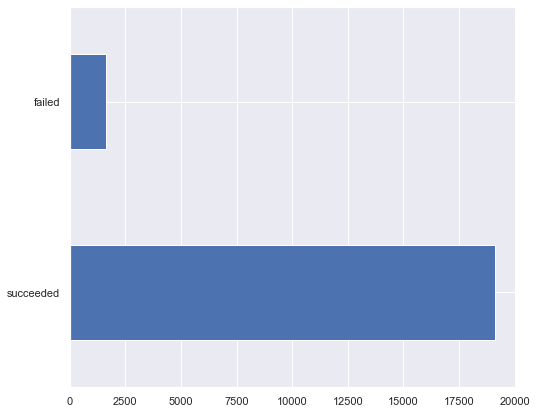

In [442]:
# Distribution of the counts for all successful and failed attack counts
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['success'].value_counts()[:10].plot(kind='barh');

> The graph reveals that they were successful in the majority of their attacks, with 19115 successful attacks and 1625 unsuccessful attacks.

### The country in which the attack took place

In [398]:
# Checking for country_tx counts
tdf.country_txt.value_counts().head()

Somalia                             4943
Nigeria                             4803
South Africa                        1946
Democratic Republic of the Congo    1132
Sudan                               1003
Name: country_txt, dtype: int64

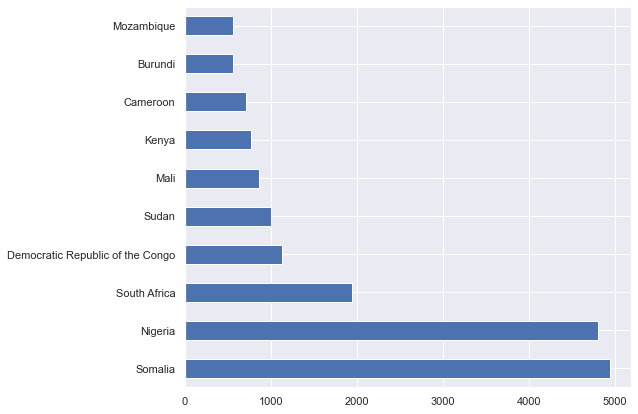

In [428]:
# Top 10 country_txt 
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['country_txt'].value_counts()[:10].plot(kind='barh');

> According to the graph above, the majority of the attacks occurred in Somalia, Nigeria, and South Africa, with Somalia having the most assaults (4943), Nigeria having 4803, and South Africa having 1946.

### Method of carrying out the attack (assassination, bombing, shooting, explosion, etc)

In [400]:
# Checking for attacktype1_txt counts
tdf.attacktype1_txt.value_counts().head()

Armed Assault                  7343
Bombing/Explosion              5926
Hostage Taking (Kidnapping)    2520
Assassination                  1851
Unknown                        1736
Name: attacktype1_txt, dtype: int64

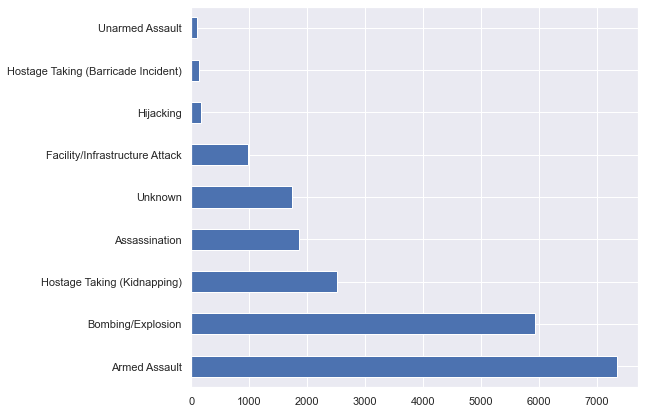

In [429]:
# Top 10 attacktype1_txt 
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['attacktype1_txt'].value_counts()[:10].plot(kind='barh');

> Armed Assault = 7343, Bombing/Explosion = 5926, and Hostage Taking (Kidnapping) = 2520 are the most common types of assault.

### The main target of the terrorist group

In [402]:
# Checking for targtype1_txt counts
tdf.targtype1_txt.value_counts().head()

Private Citizens & Property    7042
Military                       3925
Government (General)           2435
Police                         1716
Business                       1386
Name: targtype1_txt, dtype: int64

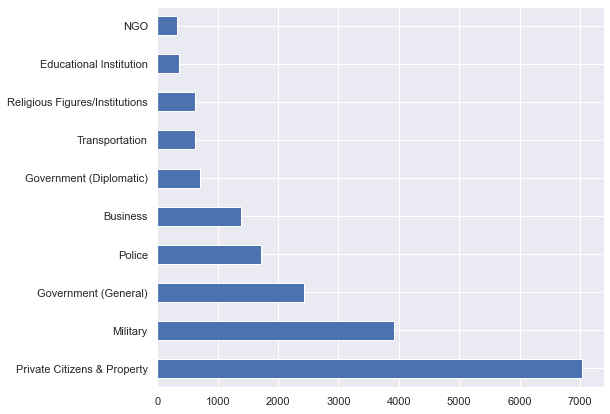

In [430]:
# Top 10 targtype1_txt organzation
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['targtype1_txt'].value_counts()[:10].plot(kind='barh');

> The *Private Citizens & Property = 7042*, *Military = 3925*, and the *Government (General) = 2435* are the major targets of their attacks.

### The Subgroup target of the terrorist group

In [490]:
# Checking for targsubtype1_txt counts
tdf.targsubtype1_txt.value_counts().head()

Village/City/Town/Suburb                                   2377
Unnamed Civilian/Unspecified                               1767
Military Personnel (soldiers, troops, officers, forces)    1297
Military Barracks/Base/Headquarters/Checkpost              1209
Government Personnel (excluding police, military)           891
Name: targsubtype1_txt, dtype: int64

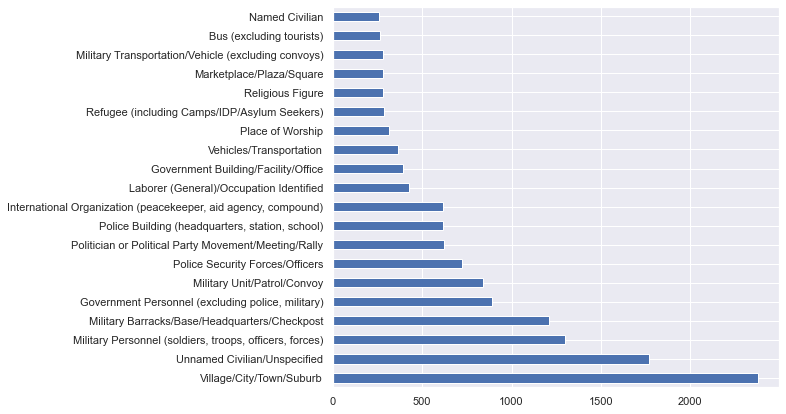

In [431]:
# Top 20 targtype1_txt organzation
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['targsubtype1_txt'].value_counts()[:20].plot(kind='barh');

> Village/City/Town/Suburb = 2377, Unnamed Civilian/Unspecified = 1767, Military Personnel (soldiers, troops, officers, forces)=1297' Military Barracks/Base/Headquarters/Checkpost=1209, and Government Personnel (excluding police, military)=891 are the primary targeted subgroups.

### Name of the group that carried out the attack

In [409]:
 # Checking for gname  counts
tdf.gname.value_counts().head()

Unknown                                     7004
Al-Shabaab                                  4028
Boko Haram                                  2867
Fulani extremists                            861
African National Congress (South Africa)     584
Name: gname, dtype: int64

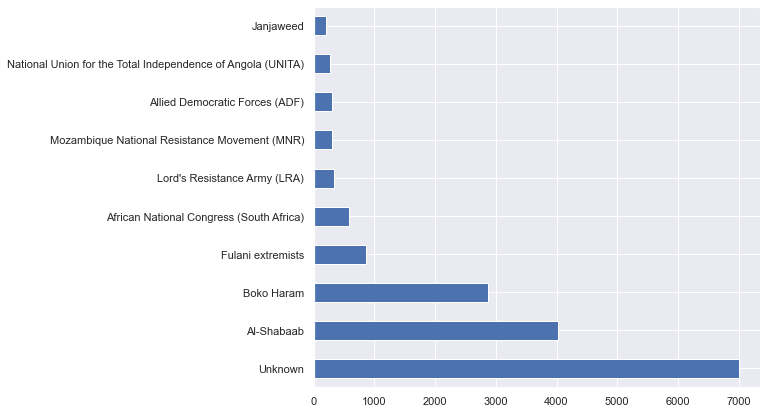

In [432]:
# Top 10 gname
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['gname'].value_counts()[:10].plot(kind='barh');

>Unknown = 7004, Al-Shabaab = 4028, and Boko Haram = 2867 are the main perpetrators of these assaults.

### The weapon type 1 used by the terrorists

In [411]:
# Checking for weaptype1_txt   counts
tdf.weaptype1_txt .value_counts().head()

Firearms      9318
Explosives    6820
Unknown       2978
Incendiary     981
Melee          595
Name: weaptype1_txt, dtype: int64

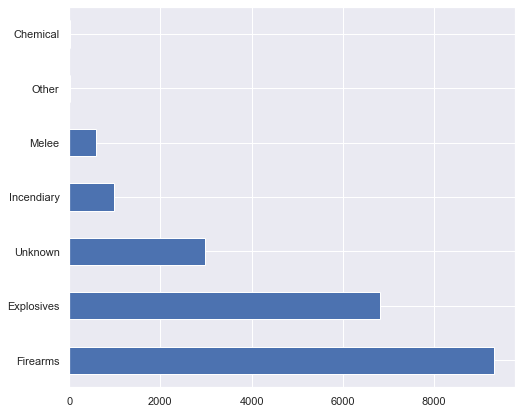

In [493]:
# Top 7 weaptype1_txt
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['weaptype1_txt'].value_counts()[:7].plot(kind='barh');

> Firearms=9318, Explosives=6820, and Unknown=2978 were the most often utilized weapons by the terrorists.

### The Subweapon type 1 used by the terrorists

In [415]:
# Checking for weapsubtype1_txt   counts
tdf.weapsubtype1_txt.value_counts().head()

Unknown Gun Type                             7114
Unknown Explosive Type                       2277
Automatic or Semi-Automatic Rifle            1492
Grenade                                      1030
Projectile (rockets, mortars, RPGs, etc.)    1008
Name: weapsubtype1_txt, dtype: int64

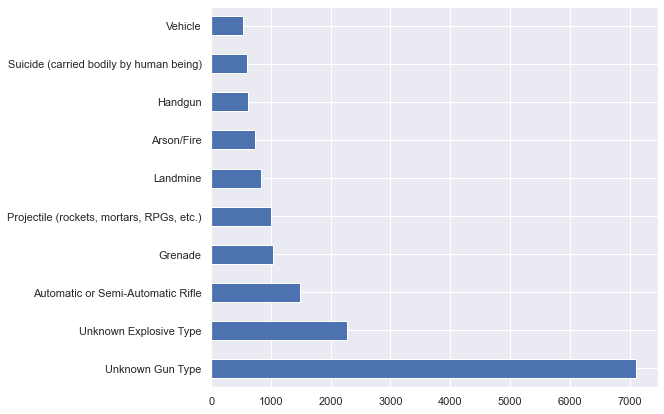

In [434]:
# Top 10 weapsubtype1_txt
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['weapsubtype1_txt'].value_counts()[:10].plot(kind='barh');

> Unknown Gun Type = 7114, Unknown Explosive Type=2277, and Automatic or Semi-Automatic Rifle=1492 are the subweapon types employed by the terrorist.

### The weapon type 2 used by the terrorists

In [417]:
# Checking for weaptype2_txt   counts
tdf.weaptype2_txt.value_counts().head()

Incendiary    1120
Firearms      1111
Melee          529
Explosives     285
Unknown        281
Name: weaptype2_txt, dtype: int64

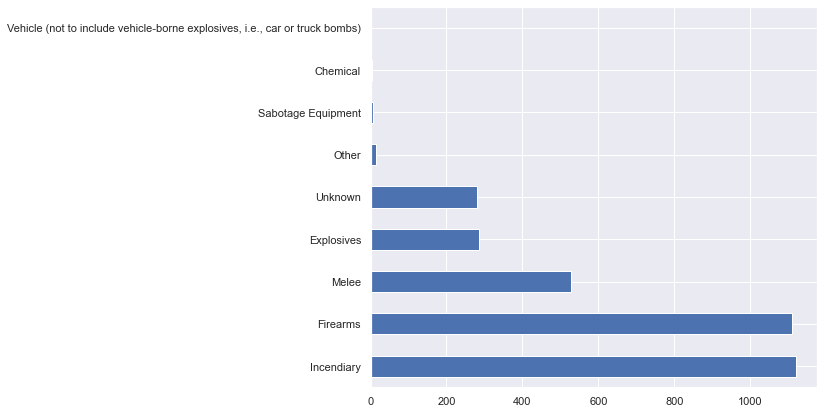

In [435]:
# Top 10 weaptype2_txt
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['weaptype2_txt'].value_counts()[:10].plot(kind='barh');

> Incendiary = 1120, Firearms = 1111, and Melee = 529 are the most common type 2 weapons they employed.

### The Subweapon type 2 used by the terrorists

In [419]:
# Checking for weapsubtype2_txt counts
tdf.weapsubtype2_txt.value_counts().head()

Arson/Fire                                   1017
Unknown Gun Type                              713
Knife or Other Sharp Object                   395
Automatic or Semi-Automatic Rifle             324
Projectile (rockets, mortars, RPGs, etc.)      97
Name: weapsubtype2_txt, dtype: int64

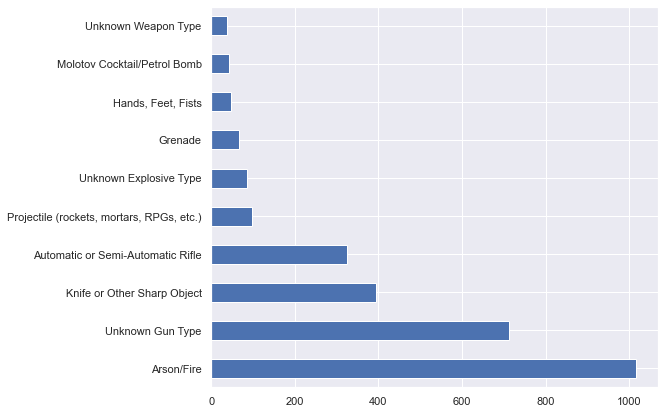

In [436]:
# Top 10 weapsubtype2_txt
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['weapsubtype2_txt'].value_counts()[:10].plot(kind='barh');

>  Arson/Fire  = 1017, Unknown Gun Type = 713 and Knife or Other Sharp Object =395 are the  subweapon type 2 mostly used by the terrorists

### The Nationality of the terrorists

In [421]:
# Checking for natlty1_txt counts
tdf.natlty1_txt.value_counts().head()

Nigeria                             4634
Somalia                             3784
South Africa                        1942
International                       1438
Democratic Republic of the Congo    1027
Name: natlty1_txt, dtype: int64

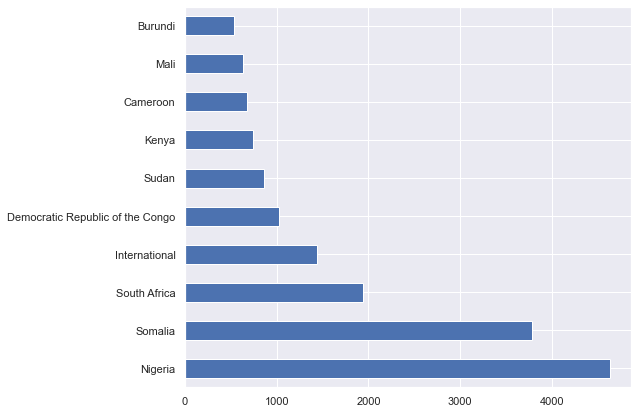

In [437]:
# Top 10 natlty1_txt
plt.figure(figsize = [8,7])
sns.set_theme(style="darkgrid")
tdf['natlty1_txt'].value_counts()[:10].plot(kind='barh');

>The majority of terrorist organizations are based in these three countries: Nigeria (4634), Somalia (3784), and South Africa (1942).

# Machine Learning

### Spliting the dataset into  training data and testing data

In [445]:
# Seprating the target (y) from  the features (X) dataset 
y =tdf.success
X =tdf.drop(['success', 'iyear', 'imonth', 'iday',
                    'country_txt','attacktype1_txt', 'targtype1_txt' ,  'targsubtype1_txt',
                    'target1', 'natlty1_txt', 'gname', 'weaptype1_txt',
                    'weapsubtype1_txt', 'weaptype2_txt',  'weapsubtype2_txt'], axis = 1)

In [446]:
#checking the first 5 values on the target variable
y.head()

0    succeeded
1    succeeded
2    succeeded
3    succeeded
4    succeeded
Name: success, dtype: object

In [497]:
#checking the first 5 values on the feature variables
X.head()

,latitude,longitude,crit1,crit2,crit3,doubtterr,suicide,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,2.000000,25.000000,1,1,0,1,0,1.0,0.0,0,0,0,1,1,1
1,2.000000,25.000000,1,1,1,0,0,0.0,0.0,0,1,0,1,1,1
2,2.000000,25.000000,1,1,1,0,0,0.0,0.0,0,1,0,1,1,1
3,2.000000,25.000000,1,1,1,0,0,1.0,0.0,0,1,1,1,1,1
4,11.583513,37.397019,1,1,1,0,0,0.0,0.0,0,1,0,0,0,0


In [499]:
#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100)

In [500]:
# Checking Number of succeeded/failed attack in both the train and test dataset after splitting
from collections import Counter
print ('Number of succeeded attack in the train dataset:', Counter(y_train))
print ('Number of succeeded attack in the test dataset:', Counter(y_test))

Number of succeeded attack in the train dataset: Counter({'succeeded': 13377, 'failed': 1140})
Number of succeeded attack in the test dataset: Counter({'succeeded': 5737, 'failed': 485})


In [501]:
#standaization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Training 

**Precision:** The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Recall:** The recall is intuitively the ability of the classifier to find all the positive samples.

**F1-Score:** The f1-score gives you the harmonic mean of precision and recall.

**Support:** The support is the number of true response occurrences that lie in each class.

**Accuracy:**  defines how capable the classification model (classifier) is. 

### I. Logistic Regression

In [519]:
# Logistic classifier
logreg =  LogisticRegression(solver='liblinear')

In [520]:
# Model
lmodel= logreg.fit(X_train,y_train)

In [521]:
# Model Score for train dataset
print("Accuracy:",lmodel.score(X_train,y_train))

Accuracy: 0.9214713783839636


In [522]:
# Model Score for test dataset
print("Accuracy:",lmodel.score(X_test,y_test))

Accuracy: 0.922050787528126


In [523]:
# Logistic Regression model prediction and report
y_pred = lmodel.predict(X_test)
log_accuracy = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

      failed       0.00      0.00      0.00       485
   succeeded       0.92      1.00      0.96      5737

    accuracy                           0.92      6222
   macro avg       0.46      0.50      0.48      6222
weighted avg       0.85      0.92      0.88      6222



>The above output shows the performance of the model on testing data. The accuracy and the F1 score is around 0.92 and 0.96 repectively.

In [524]:
#model prediction comparism 
compare_result=pd.DataFrame()
compare_result["Actual"]=y_test
compare_result["Predicted"]=lmodel.predict(X_test)

In [525]:
compare_result

,Actual,Predicted
19094,succeeded,succeeded
1496,succeeded,succeeded
4849,succeeded,succeeded
6831,failed,succeeded
6244,succeeded,succeeded
...,...,...
12573,succeeded,succeeded
20359,succeeded,succeeded
7644,succeeded,succeeded
2356,succeeded,succeeded


> Although the accuracy is excellent, it predicted index **6831**, whose actual value is *failed* as opposed to *successful*. 

### II. Naive Bayes

In [459]:
# Naive Bayes classifier
nai_bay = GaussianNB()

In [460]:
# Model
nmodel= nai_bay.fit(X_train,y_train)

In [461]:
# Model Score for train dataset
print("Accuracy:",nmodel.score(X_train,y_train))

Accuracy: 0.33353998760074394


In [462]:
# Model Score for test dataset
print("Accuracy:",nmodel.score(X_test,y_test))

Accuracy: 0.33445837351333974


In [464]:
# Naive Bayes model prediction and report
y_pred = nmodel.predict(X_test)
naive_accuracy = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

      failed       0.10      0.90      0.17       485
   succeeded       0.97      0.29      0.44      5737

    accuracy                           0.33      6222
   macro avg       0.53      0.59      0.31      6222
weighted avg       0.90      0.33      0.42      6222



>The above output shows the performance of the model on testing data. The accuracy and the F1 score is around 0.33 and 0.44 repectively.

In [526]:
#model prediction comparism 
compare_result=pd.DataFrame()
compare_result["Actual"]=y_test
compare_result["Predicted"]=nmodel.predict(X_test)

In [527]:
compare_result

,Actual,Predicted
19094,succeeded,failed
1496,succeeded,failed
4849,succeeded,failed
6831,failed,failed
6244,succeeded,failed
...,...,...
12573,succeeded,failed
20359,succeeded,failed
7644,succeeded,failed
2356,succeeded,succeeded


>Because the bulk of the predictions were *failed*, this model has a poor level of prediction accuracy.

### III. Support Vector Machines 

In [537]:
# Support Vector Machines (SVM) classifier
svclassifier = SVC()

In [538]:
# Model
svcmodel= svclassifier.fit(X_train,y_train)

In [539]:
# Model Score for train dataset
print("Accuracy:",svcmodel.score(X_train,y_train))

Accuracy: 0.9214713783839636


In [540]:
# Model Score for test dataset
print("Accuracy:",svcmodel.score(X_test,y_test))

Accuracy: 0.922050787528126


In [541]:
# SVM model prediction and report
y_pred = svcmodel.predict(X_test)
svm_accuracy = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

      failed       0.00      0.00      0.00       485
   succeeded       0.92      1.00      0.96      5737

    accuracy                           0.92      6222
   macro avg       0.46      0.50      0.48      6222
weighted avg       0.85      0.92      0.88      6222



>The above output shows the performance of the model on testing data. The accuracy and the F1 score is around 0.92 and 0.96 repectively.

In [542]:
#model prediction comparism 
compare_result=pd.DataFrame()
compare_result["Actual"]=y_test
compare_result["Predicted"]=svcmodel.predict(X_test)

In [543]:
compare_result

,Actual,Predicted
19094,succeeded,succeeded
1496,succeeded,succeeded
4849,succeeded,succeeded
6831,failed,succeeded
6244,succeeded,succeeded
...,...,...
12573,succeeded,succeeded
20359,succeeded,succeeded
7644,succeeded,succeeded
2356,succeeded,succeeded


>Although the accuracy is excellent, it predicted index **6831**, whose actual value is *failed* as opposed to *successful*. 

### VI. Neural Networks 

In [550]:
# Neural Networks classifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,  random_state=1)

In [551]:
# Model
nnmodel= nn.fit(X_train,y_train)

C:\Users\Ken\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [552]:
# Model Score for train dataset
print("Accuracy:",nnmodel.score(X_train,y_train))

Accuracy: 0.9439278087759179


In [547]:
# Model Score for test dataset
print("Accuracy:",nnmodel.score(X_test,y_test))

Accuracy: 0.9318547090967535


In [548]:
# Neural Networks model prediction and report
y_pred = nnmodel.predict(X_test)
nn_accuracy = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

      failed       0.68      0.24      0.35       485
   succeeded       0.94      0.99      0.96      5737

    accuracy                           0.93      6222
   macro avg       0.81      0.61      0.66      6222
weighted avg       0.92      0.93      0.92      6222



>The above output shows the performance of the model on testing data. The accuracy and the F1 score is around 0.93 and 0.96 repectively.

In [549]:
#model prediction comparism 
compare_result=pd.DataFrame()
compare_result["Actual"]=y_test
compare_result["Predicted"]=nnmodel.predict(X_test)

In [488]:
compare_result

,Actual,Predicted
19094,succeeded,succeeded
1496,succeeded,succeeded
4849,succeeded,failed
6831,failed,failed
6244,succeeded,succeeded
...,...,...
12573,succeeded,succeeded
20359,succeeded,succeeded
7644,succeeded,succeeded
2356,succeeded,succeeded


>Although the accuracy is excellent, it projected index **4849**, which is *succeeded* as *failed*.

# Evaluation of all the models on a bar chart

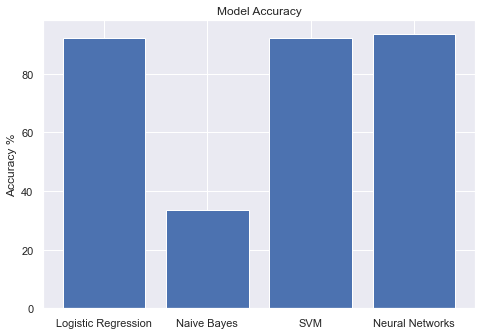

In [489]:
# Bar chart of models with respect to their accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Neural Networks']
acc_scores = [log_accuracy, naive_accuracy, svm_accuracy, nn_accuracy]
ax.bar(model, acc_scores)
ax.set_ylabel('Accuracy %')
ax.set_title('Model Accuracy')
plt.show()

> As can be seen from the graph above, Naive Bayes has the lowest prediction accuracy of all the models.